In [21]:

# !pip install wordcloud --user
import pandas as pd

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# % matplotlib inline


# str = extractFileText("sonnets.txt");
# extractBefore(str,"II")

In [6]:
import pickle
file_path = '../models/data.pkl'
data = pickle.load(open(file_path, 'rb'))

In [37]:
X_train_df = data['X_train_df']

text_cols = ["name","summary","space","description","neighborhood_overview","notes","transit","access",
             "interaction","house_rules","host_about"]

def __clean_text(x):
    for punct in "/-'":
        x = x.replace(punct, ' ')
    for punct in '&':
        x = x.replace(punct, f' {punct} ')
    for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~•' + '“”’':
        x = x.replace(punct, '')
    return x.lower()

def __parseTextCols(x):
    finalTexts = []
    for i in x:
        if(pd.notna(i) and i not in finalTexts):
            finalTexts.append(i)
    text = __clean_text(' '.join(finalTexts))
    return text
    
textos = X_train_df.sample(frac=.5)[text_cols].apply(__parseTextCols, axis=1)

In [38]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

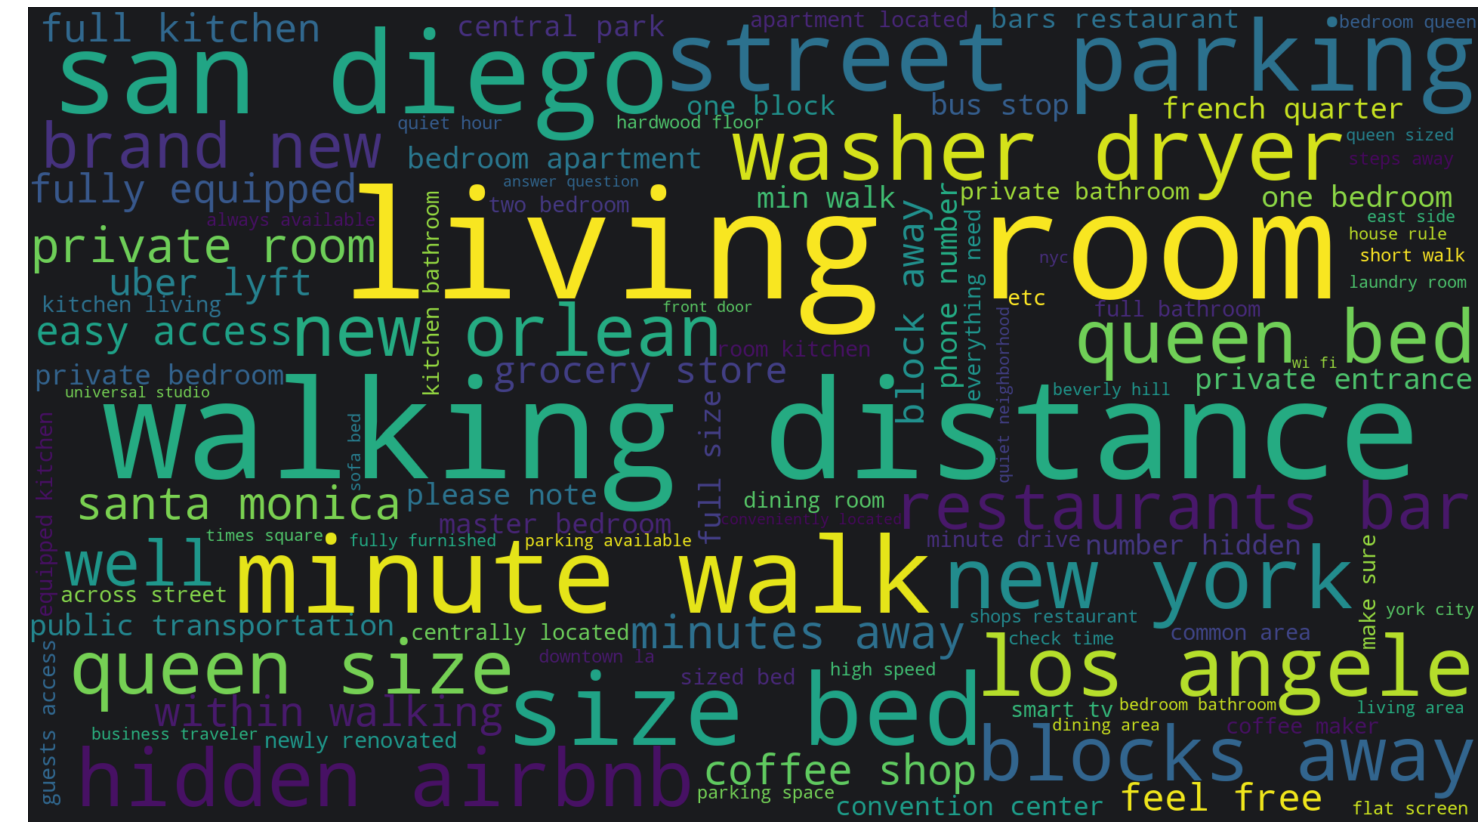

In [39]:
text = ' '.join(textos)



wordcloud = WordCloud(max_font_size=200, max_words=100, width=1920, height=1080, background_color="#1a1b1e", stopwords=stopwords_en).generate(text)
my_dpi = 50
# Display the generated image:
plt.figure(figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()